# `Romeo` `INVLAPLACE` Demo

This is a short demo illustrating the ability of `Romeo` to compute Inverse Laplace transform of a rather general class of LTI systems (`invlaplace`).

The demo is meant primarily for testing purposes. It also serves as a rather extensive collection of inverse Laplace transforms.

See also http://eqworld.ipmnet.ru/en/auxiliary/aux-inttrans.htm

In [1]:
using Revise

In [62]:
using Plots
using Printf
using SpecialFunctions

In [4]:
using Romeo.LTI

## Common definitions and settings

In [69]:
s = Diff(1)

Diff{Int64}(1)

In [70]:
Δt = 0.001
N = 1000

1000

In [71]:
function ilt_compare(G, g, N, Δt)
    t = 0:Δt:1-Δt
    ga = g.(t)
    ge = invlaplace(G, N, Δt)
    pg = plot(t, ga, label="actual", title="Inverse Laplace transforms")
    plot!(t, ge, linestyle=:dash, label="estimated")
    err = abs.(ga .- ge)
    mse = sqrt(sum(err.^2)/length(t))
    pe = plot(t, err, label="abs. error", title="MSE = $(@sprintf("%.2g", mse))")
    plot(pg, pe, layout=grid(2, 1, heights=[0.75, 0.25]))
end

macro ilt_compare()
    :( ilt_compare(G, g, N, Δt) )
end

@ilt_compare (macro with 2 methods)

## Expressions with rational functions

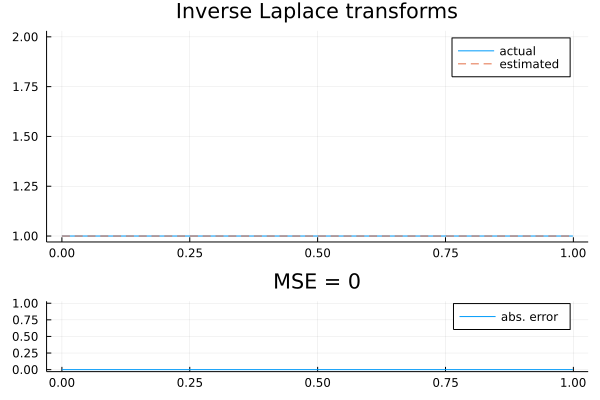

In [72]:
G = 1/s
g = t -> 1

@ilt_compare

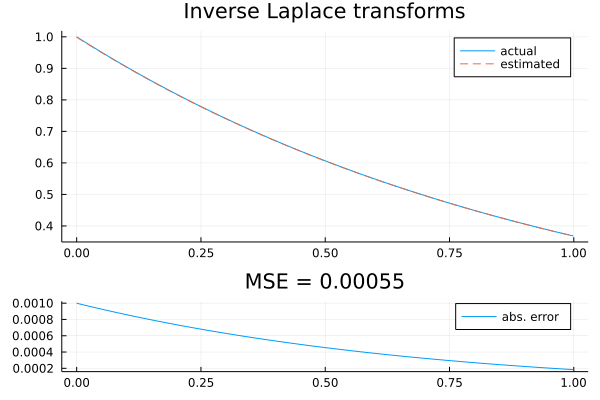

In [73]:
G = 1/(s+1)
g = t -> exp(-t)

@ilt_compare

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295


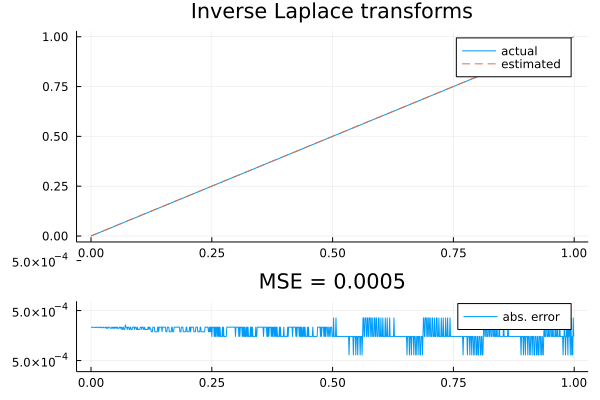

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\repmi\.julia\packages\PlotUtils\ebPq2\src\ticks.jl:295


In [77]:
G = 1/s^2
g = t -> t

@ilt_compare

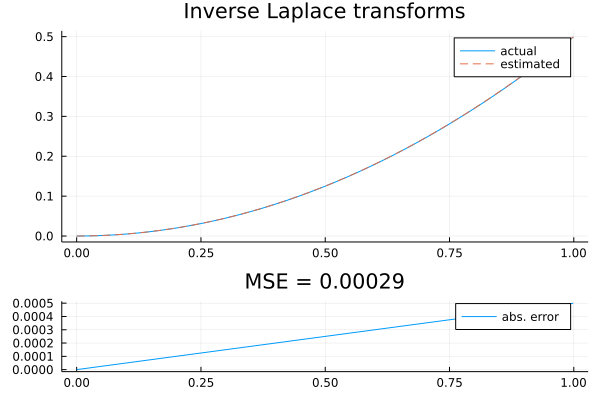

In [78]:
G = 1/s^3
g = t -> 1/2 * t^2

@ilt_compare

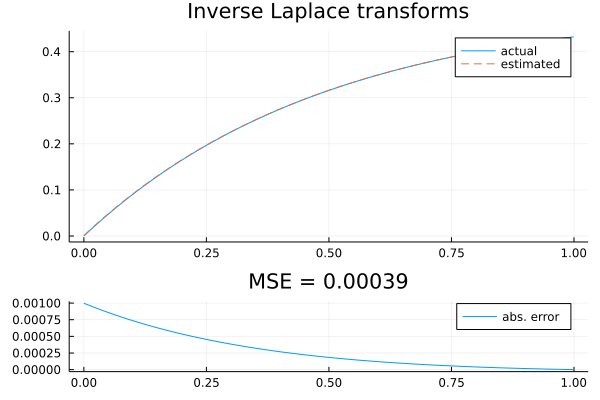

In [79]:
G = 1/s/(s+2)
g = t -> 1/2 * (1 - exp(-2*t))

@ilt_compare

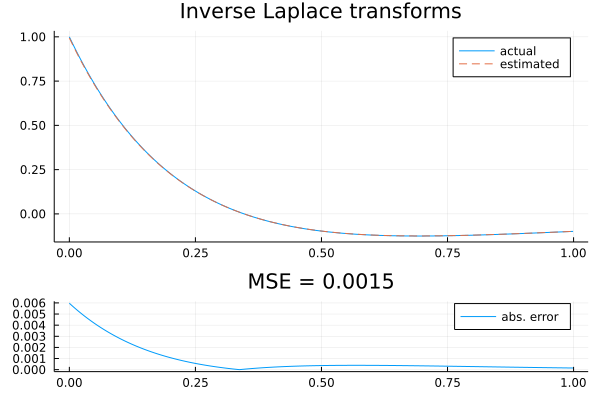

In [80]:
G = s/(s+2)/(s+4)
g = t -> 1/(2-4) * (2*exp(-2*t)- 4*exp(-4*t))

@ilt_compare